# custom-svm
Project for the **Combinatorial Decision Making and Optimization** course - Master in AI, *Alma Mater Studiorum*
#### Credits:
 - Mattia Orlandi
 - Lorenzo Mario Amorosa

Import the required libraries, in particular the custom implementation of SVM contained in the `svm.py` 
module and the dataset generator (`sample_data_generator.py`).  
Set some useful constants, like the random state `RND`, the number of samples `N_SAMP` 
and the number of features `N_FEAT`.

In [63]:
import cvxopt
from svm import SVM
from data.sample_data_generator import *
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

RND = 42
N_SAMP = 200
N_FEAT = 2

Define a useful function which, given a `SVM` object, the training and the test sets, 
performs the following operations:
- `SVM.fit(...)` on the training set;
- `SVM.predict(...)` on the test set;
- computes the accuracy score;
- plots the result (only for our svm).

In [64]:
def fit_and_predict(svm: SVM,
                    X_train: np.ndarray,
                    X_test: np.ndarray,
                    y_train: np.ndarray,
                    y_test: np.ndarray,
                    is_custom: bool):
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    print('Accuracy: {0:.2f}%'.format(accuracy_score(y_test, y_pred) * 100))
    if is_custom:
        svm.plot2D(np.concatenate((X_train, X_test)), np.concatenate((y_train, y_test)))

Test the SVM on a linearly separable dataset.

3 support vectors found out of 150 data points:
1) X: [0.63352971 0.53577468]	y: 1.0
2) X: [0.28203457 0.17743954]	y: -1.0
3) X: [0.88708642 0.77987555]	y: -1.0
Bias of the hyper-plane: 23.732099
Weights of the hyper-plane:
[-238.21047491  239.24481366]
Accuracy: 100.00%


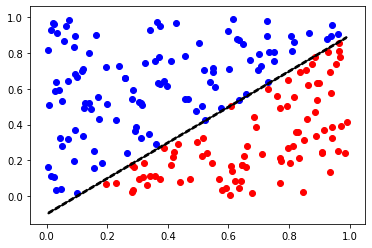

In [65]:
X_train, X_test, y_train, y_test = linear_data_generator(n_samples=N_SAMP,
                                                         n_features=N_FEAT,
                                                         random_state=RND)
svm = SVM()
fit_and_predict(svm, X_train, X_test, y_train, y_test, True)

Test the SVM on a non-linear separable dataset.

13 support vectors found out of 150 data points:
1) X: [-0.41837984 -0.37600114]	y: 1
2) X: [-0.59662249  0.0820507 ]	y: 1
3) X: [-0.23228731  0.83607726]	y: -1
4) X: [0.45176366 0.43918444]	y: 1
5) X: [-0.18800123 -0.94197532]	y: -1
6) X: [-0.6776143  -0.29964045]	y: -1
7) X: [-0.63223513  0.64210376]	y: -1
8) X: [0.70456055 0.51188204]	y: -1
9) X: [-0.8752793  0.3160447]	y: -1
10) X: [0.55456561 0.71599632]	y: -1
11) X: [0.83579998 0.15894016]	y: -1
12) X: [ 0.64049665 -0.57076481]	y: -1
13) X: [ 0.51430956 -0.41598642]	y: 1
Bias of the hyper-plane: -1.720588
Accuracy: 52.00%


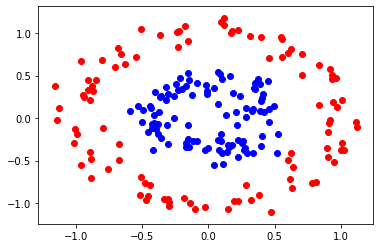

In [66]:
X_train, X_test, y_train, y_test = non_linear_data_generator(n_samples=N_SAMP,
                                                             random_state=RND)
svm = SVM(kernel='rbf')
fit_and_predict(svm, X_train, X_test, y_train, y_test, True)

The following SVM models are tested on a dataset constructed by simulating measurements of distances between sensors and IoT devices in a building.

The task of the classifier is to predict the room in which the device is located given the input of the sensors.

In the following figure, it is given a floor with 2 rooms (blue and red) and 5 sensors.

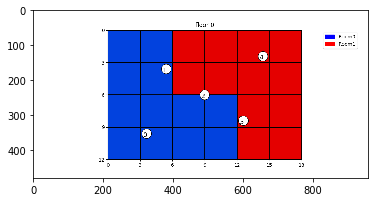

In [67]:
img = plt.imread('data/data_png/2_rooms.png')
plt.imshow(img)
plt.show()

Utility function to read and process the dataset

In [68]:
def read_dataset(f_name: str):
    X_raw = []
    y_raw = []
    with open(f_name, "r") as file:
        for line in file:
            features = line.split(',')[:-1]
            X_raw.append(features)
            y_raw.append(line.split(',')[-1])
    X = np.array(X_raw).astype(np.float)
    y_tmp = np.array(y_raw).astype(np.float)
    y = np.fromiter((-1 if yi == 0 else 1 for yi in y_tmp), y_tmp.dtype)
    return train_test_split(X, y, test_size=0.2, random_state=RND)

Test the SVM on a dataset sampled from the previous room.

In [69]:
cvxopt.solvers.options['show_progress'] = False
cvxopt.solvers.options['maxiters'] = 200 
f_name ="data/data_2_rooms.txt"
X_train, X_test, y_train, y_test = read_dataset(f_name)
svm = SVM(kernel="rbf")
fit_and_predict(svm, X_train, X_test, y_train, y_test, True)

41 support vectors found out of 800 data points:
1) X: [0.11277808 0.18751479 7.89591898 6.33429255 1.47638536]	y: 1.0
2) X: [5.33229325e-03 7.30257946e+00 4.28001657e-01 5.46751915e-02
 3.18836611e-04]	y: -1.0
3) X: [ 0.04870006 10.11809516  0.48302665  0.09761751  0.14717271]	y: 1.0
4) X: [1.55527971e-01 4.59553656e-02 6.39559187e-01 1.87462755e+01
 2.77716363e-03]	y: -1.0
5) X: [0.22670527 0.05161384 0.3097952  1.10081101 0.03225481]	y: -1.0
6) X: [ 0.52292884  2.07754113 50.          0.81893626  0.16675941]	y: -1.0
7) X: [0.01800134 1.42010182 0.20134259 0.01421848 0.04865913]	y: 1.0
8) X: [ 0.20224538 29.573265    2.00122253  0.05832485  0.06417383]	y: 1.0
9) X: [ 0.60594667 16.05194918 12.90153381  0.16647305  0.13011994]	y: 1.0
10) X: [0.10242753 3.40519125 0.28972532 0.09410387 0.04540129]	y: 1.0
11) X: [4.77076826e-02 5.09576220e-02 2.40105482e-04 4.49016926e-01
 1.41427729e-01]	y: 1.0
12) X: [4.94128849e-04 9.17272465e-02 4.32611682e-01 4.69221908e+01
 1.84254917e-01]	y: 1.0


Compare the previous result with `sklearn.SVC`

In [70]:
f_name ="data/data_2_rooms.txt"
X_train, X_test, y_train, y_test = read_dataset(f_name)
svm = SVC(kernel="rbf")
fit_and_predict(svm, X_train, X_test, y_train, y_test, False)

Accuracy: 92.50%


/home/lorenzo/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
